Data gotten from [GeeksforGeeks](https://www.geeksforgeeks.org/dataset-for-linear-regression/?utm_source=chatgpt.com#student-performance-dataset) 

This dataset contains information about students' academic performance, including attributes such as parents' education level, test preparation score and others.

In [45]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
def wrangle(filepath):
    df = pd.read_csv(filepath)

    # Change column name for easier access 
    df['race'] = df['race/ethnicity']
    df.drop(columns='race/ethnicity', inplace=True)

    # Create total_score column
    df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

    return df

In [47]:
df = wrangle('StudentsPerformance[1].csv')
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race,total_score
0,female,bachelor's degree,standard,none,72,72,74,group B,218
1,female,some college,standard,completed,69,90,88,group C,247
2,female,master's degree,standard,none,90,95,93,group B,278
3,male,associate's degree,free/reduced,none,47,57,44,group A,148
4,male,some college,standard,none,76,78,75,group C,229


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   race                         1000 non-null   object
 8   total_score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [84]:
df.describe()

,math score,reading score,writing score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


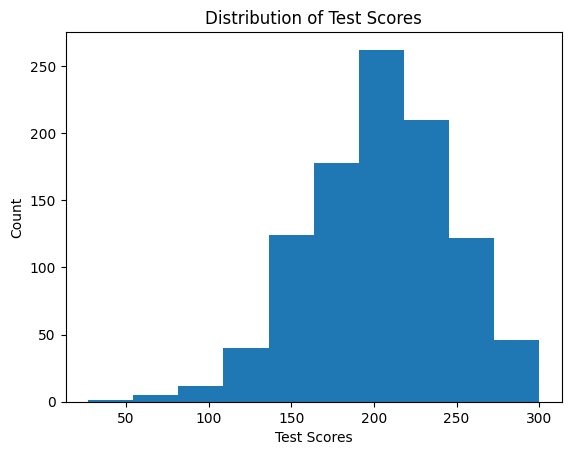

In [86]:
plt.hist(x=df['total_score'])
plt.xlabel('Test Scores')
plt.ylabel('Count')
plt.title('Distribution of Test Scores');

**Exploratory Data Analysis (EDA)**

Visualize the top 10 scorers

In [48]:
df_sorted = df.sort_values('total_score', ascending=False)
top_10 = df_sorted.head(10)
top_10

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race,total_score
916,male,bachelor's degree,standard,completed,100,100,100,group E,300
962,female,associate's degree,standard,none,100,100,100,group E,300
458,female,bachelor's degree,standard,none,100,100,100,group E,300
114,female,bachelor's degree,standard,completed,99,100,100,group E,299
712,female,some college,standard,none,98,100,99,group D,297
179,female,some high school,standard,completed,97,100,100,group D,297
165,female,bachelor's degree,standard,completed,96,100,100,group C,296
625,male,some college,standard,completed,100,97,99,group D,296
685,female,master's degree,standard,completed,94,99,100,group E,293
903,female,bachelor's degree,free/reduced,completed,93,100,100,group D,293


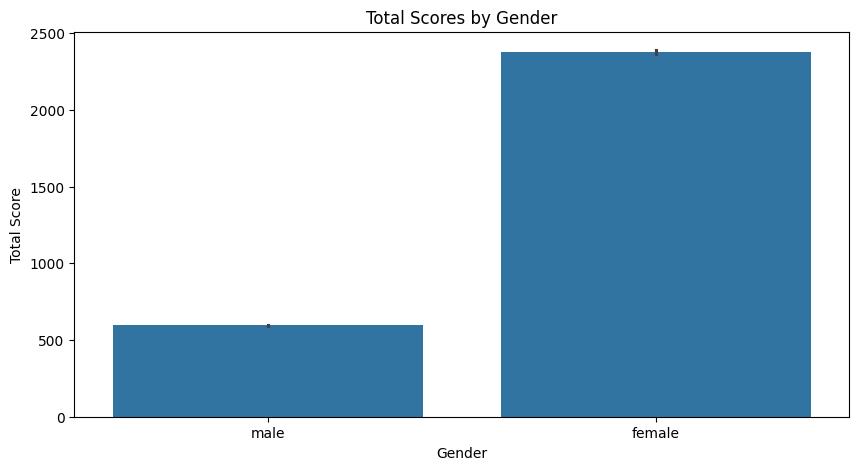

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(x="gender", y="total_score", data=top_10, estimator=sum)
plt.xlabel("Gender")
plt.ylabel("Total Score")
plt.title("Total Scores by Gender")

plt.show()

Females constitute 80% of the top scorers🤩


The top scorers are in group E race (Mixed- White and Black African)    


(*I'm not shocked😌*)

*Relationship between columns*

Parent Level of Education and Total Score

In [80]:
print('The levels are:')
for level in df['parental level of education'].unique():
    print(f'- {level}')

The levels are:
- bachelor's degree
- some college
- master's degree
- associate's degree
- high school
- some high school


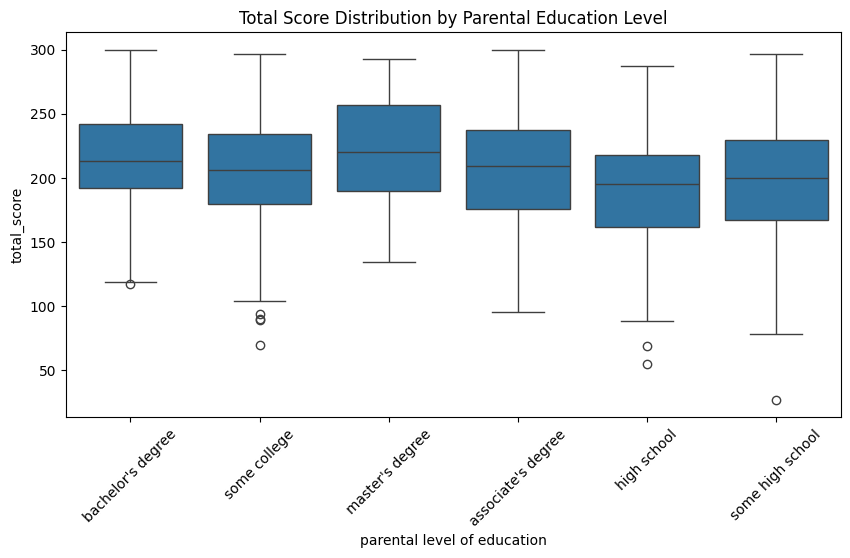

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='parental level of education', y='total_score', data=df)
plt.xticks(rotation=45) 
plt.title('Total Score Distribution by Parental Education Level')
plt.show()

Parents who have master's degree, bachelor's degree and associate's degree tend to have students who score higher

Gender and Total Score

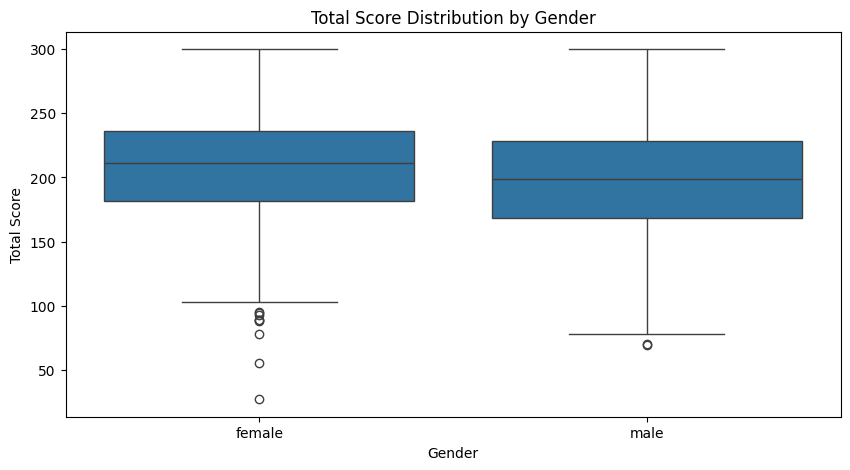

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='total_score', data=df)
plt.xlabel('Gender')
plt.ylabel('Total Score')
plt.title('Total Score Distribution by Gender')
plt.show()

As observed earlier, there are more females who score higher than males 

*(Honestly, I'm not suprised)*

Race and Total Score

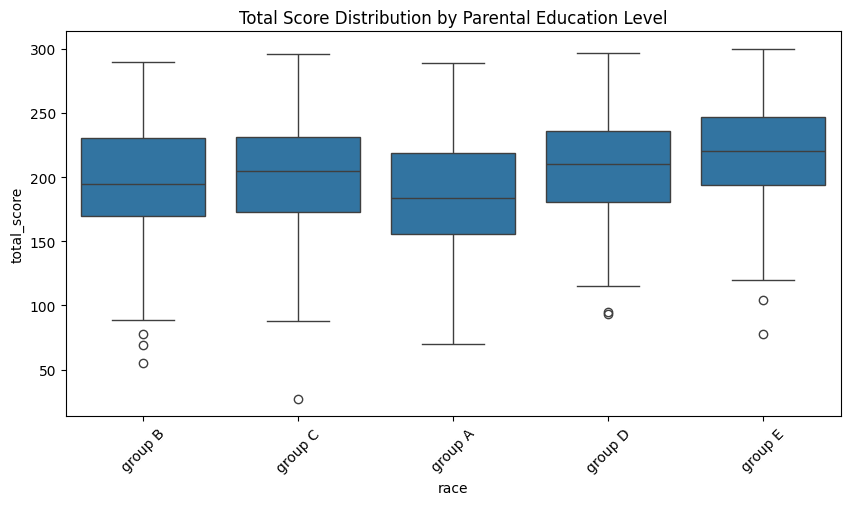

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='race', y='total_score', data=df)
plt.xticks(rotation=45)
plt.title('Total Score Distribution by Parental Education Level')
plt.show()

As observed, mixed students (Group D & E) perform better and white students (Group A) perform worse

Test Preparation and Total Score

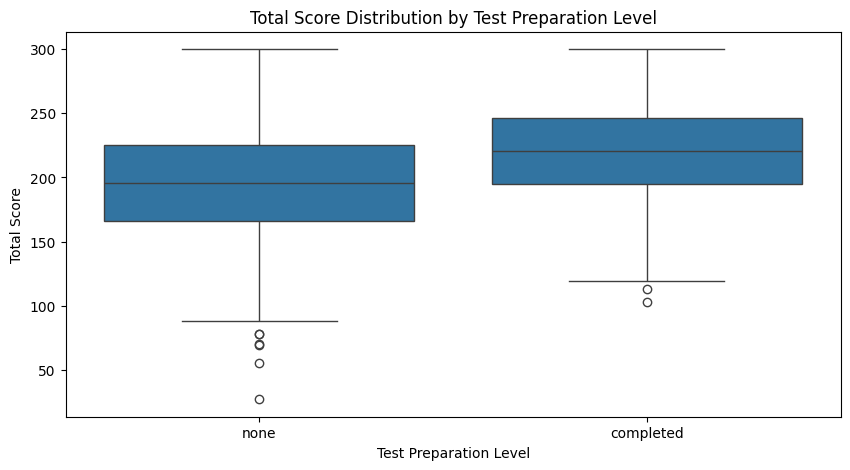

In [82]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='test preparation course', y='total_score', data=df)
plt.xlabel('Test Preparation Level')
plt.ylabel('Total Score')
plt.title('Total Score Distribution by Test Preparation Level')
plt.show()

In [58]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

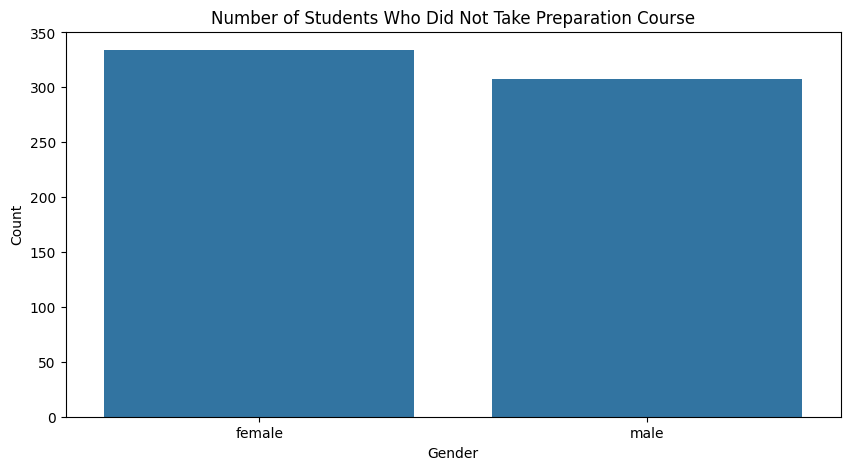

In [63]:
not_test = df[df['test preparation course'] == 'none']
gender_counts = not_test["gender"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Students Who Did Not Take Preparation Course')
plt.show()

Through normal logic, students who take the preparation course perform better than those who don't

64% of students did not take the preparation course and females were the larger population

Lunch and Total Score

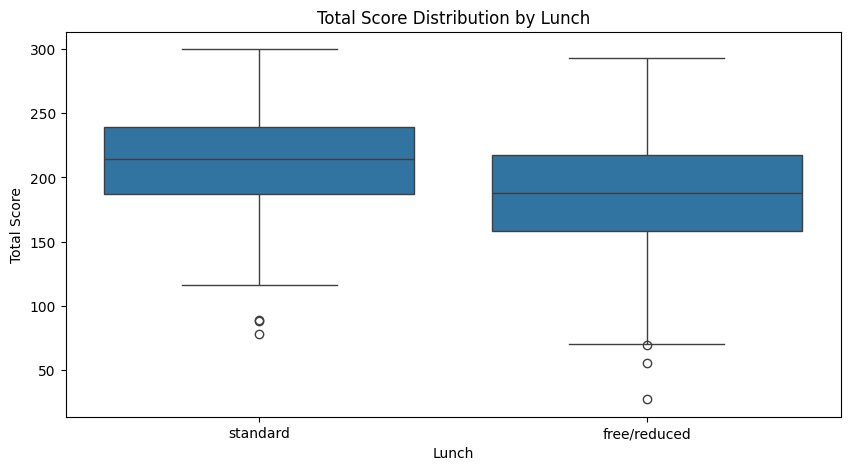

In [72]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='lunch', y='total_score')
plt.xlabel('Lunch')
plt.ylabel('Total Score')
plt.title('Total Score Distribution by Lunch')
plt.show()

Students who can afford standard meal perform better than those who can't